In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## Création des deux classes

In [2]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(mean=[0, 3], cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class) #1
positive_samples = np.random.multivariate_normal(mean=[3, 0], cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class) #2

In [32]:
negative_samples.shape

(1000, 2)

In [33]:
positive_samples.shape

(1000, 2)

## On met les deux sets de données dans un même vecteur de taille (2000, 2) qui sera le vecteur d'entrée "inputs" du modèle

In [6]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [7]:
inputs.shape

(2000, 2)

## Creation des targets du modèle : un array de shape (2000, 1) contenant des 0 et des 1

### targets[i, 0] vaut 0 si inputs[i] appartient à la classe 0

### targets[i, 0] vaut 1 si inputs[i] appartient à la classe 1

In [8]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"), 
                     np.ones((num_samples_per_class, 1), dtype="float32")))

In [9]:
targets.shape

(2000, 1)

# Affichage des données d'entrée inputs

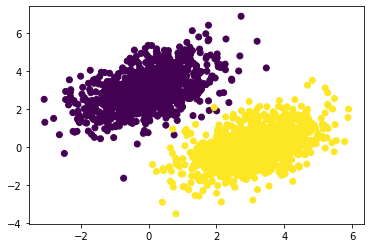

In [12]:
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

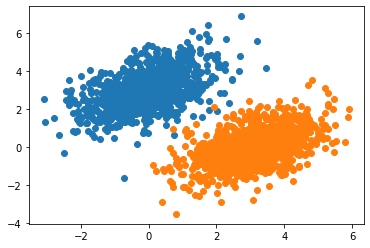

In [35]:
plt.scatter(negative_samples[:, 0], negative_samples[:, 1])
plt.scatter(positive_samples[:, 0], positive_samples[:, 1])
plt.show()

# Création du classeur linéaire

## Les variables du classeur (weights W et b)

In [37]:
input_dim = 2 #1
output_dim = 1 #2

# utilisation de tf.Variable car les poids seront mis à jour régulièrement
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim,
output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [38]:
W

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.18276131],
       [0.59228384]], dtype=float32)>

In [39]:
b

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>

## La forward pass function 

### Un classeur linéaire est une transformation affine de la forme : prediction = (W . input + b)

In [41]:
def model(inputs):
 return tf.matmul(inputs, W) + b

## La fonction de coût : Mean Squarred Error

In [42]:
def square_loss(targets, predictions):
 per_sample_losses = tf.square(targets - predictions) #1
 return tf.reduce_mean(per_sample_losses) #2

## La fonction d'entraînement

In [43]:
learning_rate = 0.1
def training_step(inputs, targets):
 with tf.GradientTape() as tape: #1
     predictions = model(inputs) #1
     loss = square_loss(predictions, targets) #1
 grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b]) #2
 W.assign_sub(grad_loss_wrt_W * learning_rate) #3
 b.assign_sub(grad_loss_wrt_b * learning_rate) #3
 return loss

## La boucle d'entraînement batch

In [44]:
for step in range(40):
 loss = training_step(inputs, targets)
 print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 2.1653
Loss at step 1: 0.2038
Loss at step 2: 0.1136
Loss at step 3: 0.0973
Loss at step 4: 0.0902
Loss at step 5: 0.0845
Loss at step 6: 0.0795
Loss at step 7: 0.0748
Loss at step 8: 0.0706
Loss at step 9: 0.0667
Loss at step 10: 0.0631
Loss at step 11: 0.0598
Loss at step 12: 0.0568
Loss at step 13: 0.0540
Loss at step 14: 0.0515
Loss at step 15: 0.0492
Loss at step 16: 0.0470
Loss at step 17: 0.0451
Loss at step 18: 0.0433
Loss at step 19: 0.0417
Loss at step 20: 0.0402
Loss at step 21: 0.0388
Loss at step 22: 0.0375
Loss at step 23: 0.0363
Loss at step 24: 0.0353
Loss at step 25: 0.0343
Loss at step 26: 0.0334
Loss at step 27: 0.0326
Loss at step 28: 0.0318
Loss at step 29: 0.0311
Loss at step 30: 0.0305
Loss at step 31: 0.0299
Loss at step 32: 0.0294
Loss at step 33: 0.0289
Loss at step 34: 0.0285
Loss at step 35: 0.0280
Loss at step 36: 0.0277
Loss at step 37: 0.0273
Loss at step 38: 0.0270
Loss at step 39: 0.0267


## Affichage du tri effectué par le modèle

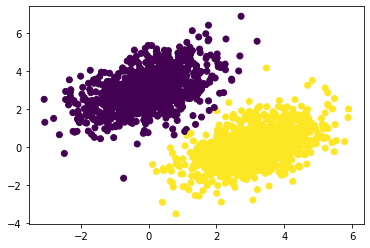

In [45]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

## Ligne de séparation des données

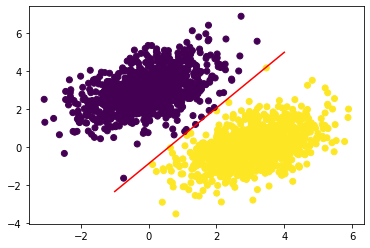

In [46]:
x = np.linspace(-1, 4, 100) #1
y = - W[0] / W[1] * x + (0.5 - b) / W[1] #2
plt.plot(x, y, "-r") #3
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5) #4